In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv("train.csv")
train.head()
#Transform the data such that there are only 2 columns, 1 being X which is a 28*28 matrix and y which is the label
cols = ['pixel'+str(i) for i in range(784)]
train['X'] = train[cols].values.tolist()
train.drop(cols,inplace = True,axis = 1)
 # Convert y into a format where is a vector where it is 1 for the correct number and 0 elsewhere
train['y'] = train["label"].apply(lambda x:[0 if i != x else 1 for i in range(10)])
train.drop('label',inplace = True,axis = 1)
train.head()
# Alternatively this step may be skipped and is likely to be skipped when using traditional libraries such as TensorFlow and Keras

,X,y
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


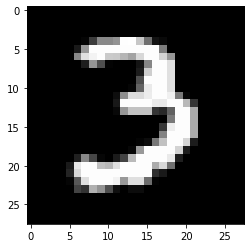

In [3]:
plt.imshow(np.array(train.loc[9,"X"]).reshape(28,28),cmap = "gray")

From scratch generation of a simple neural network where first layer is 784 neurons, 2nd layer is 25 neurons and last (output) layer is 10 neurons

In [4]:
class Network(object):
    def __init__(self,learning_rate = 0.001, epochs = 1000,batch = 10):
        #Weights is a list of different matrix each the first layer corresponding to the first matrix
        #Randomly Initialize weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch = batch
        self.weights = [np.random.randn(784,25),np.random.randn(25,10)]
        self.bias = [np.random.randn(25),np.random.randn(10)]
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    def sigmoid_deriv(self,z): # Will this work if I dont put in self IF i only call the method within the class?
        return self.sigmoid(z)*(1-self.sigmoid(z))
    def predict(self,X): #Perform the forward propagation step on 1 training example
        l2 = np.dot(X,self.weights[0]) + self.bias[0]
        l2_activ = self.sigmoid(l2)
        l3 = np.dot(l2_activ,self.weights[1]) + self.bias[1]
        pred = self.sigmoid(l3)
        return [np.argmax(i) for i in pred]
    def learn(self,X,y): #Simple Learning Step using Batch Gradient Descent - Really hope my computer can survive this
        for epoch in range(self.epochs):
            db,dw = self.backprop(X,y)
            for i in range(2):
                self.weights[i] -= dw[i]*self.learning_rate
                self.bias[i] -=  sum(db[i])*self.learning_rate
            if not epoch % 10 :
                print("Epoch", epoch,"with a cost of ",self.cost(X,y))
                
    def cost(self,X,y):
        l2 = np.dot(X,self.weights[0]) + self.bias[0]
        l2_activ = self.sigmoid(l2)
        l3 = np.dot(l2_activ,self.weights[1]) + self.bias[1]
        pred = self.sigmoid(l3)
        error = sum((-y * np.log(pred)) - ((1-y)*np.log(1-pred)))/len(X)
        return sum(error)
    def backprop(self,X,y): 
        nabla_b = [np.zeros(b.shape) for b in self.bias]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        size = X.shape[0]
        #Vectorised Implementation of Backprop
        a_s = [X] #list to store all activation
        #print("1st",a_s)
        zs = [] #list to store all zs
        activation = X
        #Forward Propagation to get the error
        for w,b in zip(self.weights, self.bias):
            z = np.dot(activation,w) + b
            zs.append(z)
            activation = self.sigmoid(z)
            a_s.append(activation)
        #Backward Propagation to get the gradient
        #2nd Layer
        delta = (a_s[-1] -y)*self.sigmoid_deriv(zs[-1]) #Delta will be a 11x10 matrix here
        nabla_b[-1] = delta/size
        nabla_w[-1] = np.dot(a_s[-2].transpose(),delta)/size
        #print("2nd Weight",nabla_w[-1])
        #1st Layer - This can actually be done in a more dynamic way to accomodate more layers
        delta2 = np.dot(delta, self.weights[-1].transpose()) * self.sigmoid_deriv(zs[-2])
        nabla_b[-2] = delta2/size
        #print(a_s[-3])
        nabla_w[-2] = np.dot(a_s[-3].transpose(), delta2)/size
        #print(nabla_w[-2])
        #print("Bias",nabla_b)
       # print(len(nabla_w))
        return(nabla_b,nabla_w)


In [5]:
#Gradient Checking to see if it is actually working
X = train.loc[:1,"X"]
X = np.array([X[i] for i in range(len(X))])
y = train.loc[:1,"y"]
y = np.array([y[i] for i in range(len(y))])
jinbe = Network()
cb,cw = jinbe.backprop(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


In [52]:
cw

[array([[-0.,  0.,  0., ...,  0.,  0.,  0.],
        [-0.,  0.,  0., ...,  0.,  0.,  0.],
        [-0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [-0.,  0.,  0., ...,  0.,  0.,  0.],
        [-0.,  0.,  0., ...,  0.,  0.,  0.],
        [-0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([[ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 1.53992261e-05, -2.11900979e-05,  4.57906383e-05,
          1.53755998e-04,  5.65312843e-07,  1.71794788e-06,
          6.29845123e-08,  9.44391338e-05,  1.53210539e-04,
          1.67560570e-04],
        [ 1.53992261e-05, -2.11900979e-05,  4.57906383e-05,
          1.53755998e-04,  5.65312843e-07,  1.71794788e-06,
          6.29845123e-08,  9.44391338e-05,  1.53210539e-04,
          1.67560570e-04],
        [ 1.53992261e-05, -2.11900979e-05,  4.57906383e-05,
          1.53755998e-04,  5.65312

In [5]:
X = train.loc[:,"X"]
X = np.array([X[i] for i in range(len(X))])
y = train.loc[:,"y"]
y = np.array([y[i] for i in range(len(y))])


In [6]:
jinbe = Network(epochs = 2000,learning_rate = 1)
jinbe.learn(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


Epoch 0 with a cost of  6.666737448012245
Epoch 10 with a cost of  4.703170162643325
Epoch 20 with a cost of  4.743184052817327
Epoch 30 with a cost of  4.817792309224899
Epoch 40 with a cost of  4.867706335814968
Epoch 50 with a cost of  4.901054568335985
Epoch 60 with a cost of  4.922205742795686
Epoch 70 with a cost of  4.935952366391651
Epoch 80 with a cost of  4.946130121491059
Epoch 90 with a cost of  4.949352785876691
Epoch 100 with a cost of  4.950552269424309
Epoch 110 with a cost of  4.94661184933806
Epoch 120 with a cost of  4.9394241551432545
Epoch 130 with a cost of  4.933407890953151
Epoch 140 with a cost of  4.921018644561162
Epoch 150 with a cost of  4.909020077509087
Epoch 160 with a cost of  4.898293332468257
Epoch 170 with a cost of  4.885052017919108
Epoch 180 with a cost of  4.871538645320821
Epoch 190 with a cost of  4.857296583813621
Epoch 200 with a cost of  4.844530916237493
Epoch 210 with a cost of  4.8300359635064
Epoch 220 with a cost of  4.8148730089078615


Epoch 1840 with a cost of  2.288915703551321
Epoch 1850 with a cost of  2.2810662746091466
Epoch 1860 with a cost of  2.2735808272087024
Epoch 1870 with a cost of  2.2627041715570986
Epoch 1880 with a cost of  2.25339452255548
Epoch 1890 with a cost of  2.242752572271917
Epoch 1900 with a cost of  2.230108998197906
Epoch 1910 with a cost of  2.221807429229676
Epoch 1920 with a cost of  2.212563085776742
Epoch 1930 with a cost of  2.204550533318728
Epoch 1940 with a cost of  2.196450340835128
Epoch 1950 with a cost of  2.188194578640937
Epoch 1960 with a cost of  2.180258297407451
Epoch 1970 with a cost of  2.1701319191446213
Epoch 1980 with a cost of  2.163301636557336
Epoch 1990 with a cost of  2.154829205244453


In [24]:
test = pd.read_csv("test.csv")
test.head()
#Transform the data such that there are only 2 columns, 1 being X which is a 28*28 matrix and y which is the label
cols = ['pixel'+str(i) for i in range(784)]
test['X'] = test[cols].values.tolist()
test.drop(cols,inplace = True,axis = 1)
 # Convert y into a format where is a vector where it is 1 for the correct number and 0 elsewhere
test_X =  test.loc[:,"X"]
test_X = np.array([test_X[i] for i in range(len(test_X))])
predictions = jinbe.predict(test_X)
labels = [i for i in range(1,len(predictions)+1)]
hi = pd.DataFrame(np.array([labels,predictions]).transpose())
hi.columns = ("ImageId","Label")
hi.set_index("ImageId",inplace = True)
hi.to_csv("submission.csv")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


In [12]:
hi

,Label
ImageId,
5,1
0,2
5,3
7,4
2,5
...,...
3,27996
7,27997
6,27998


In [69]:
predictions

[4,
 0,
 2,
 4,
 4,
 0,
 4,
 3,
 1,
 7,
 4,
 2,
 3,
 7,
 9,
 0,
 3,
 4,
 3,
 7,
 3,
 7,
 9,
 7,
 2,
 5,
 4,
 7,
 9,
 2,
 2,
 2,
 2,
 0,
 7,
 8,
 2,
 2,
 9,
 2,
 2,
 9,
 5,
 0,
 7,
 7,
 9,
 8,
 3,
 2,
 7,
 0,
 4,
 9,
 2,
 4,
 3,
 4,
 9,
 0,
 2,
 4,
 2,
 8,
 4,
 4,
 5,
 2,
 4,
 2,
 2,
 5,
 5,
 2,
 9,
 7,
 4,
 7,
 2,
 9,
 4,
 9,
 7,
 2,
 7,
 4,
 4,
 2,
 0,
 4,
 3,
 0,
 4,
 2,
 9,
 0,
 2,
 9,
 2,
 2,
 0,
 9,
 7,
 7,
 2,
 8,
 7,
 8,
 0,
 9,
 0,
 7,
 9,
 2,
 7,
 5,
 4,
 2,
 9,
 4,
 9,
 7,
 4,
 4,
 2,
 7,
 7,
 2,
 7,
 2,
 3,
 5,
 9,
 4,
 2,
 0,
 7,
 7,
 9,
 9,
 2,
 3,
 5,
 2,
 9,
 9,
 7,
 7,
 7,
 4,
 9,
 3,
 7,
 4,
 5,
 9,
 2,
 2,
 7,
 0,
 3,
 5,
 9,
 0,
 2,
 8,
 2,
 2,
 4,
 0,
 8,
 2,
 7,
 8,
 4,
 4,
 2,
 9,
 7,
 2,
 0,
 4,
 9,
 2,
 5,
 8,
 0,
 7,
 2,
 9,
 8,
 3,
 5,
 9,
 8,
 0,
 7,
 2,
 3,
 5,
 2,
 7,
 9,
 3,
 5,
 4,
 3,
 8,
 3,
 9,
 9,
 8,
 2,
 5,
 7,
 9,
 4,
 7,
 9,
 2,
 0,
 3,
 6,
 4,
 3,
 5,
 7,
 7,
 8,
 2,
 0,
 9,
 9,
 2,
 2,
 2,
 4,
 4,
 9,
 8,
 9,
 4,
 0,
 2,
 2,
 7,
 3,
 2,
 4,
 8,


In [72]:
hi.head()


,0,1
0,1,4
1,2,0
2,3,2
3,4,4
4,5,4


In [32]:
predictions2 = jinbe.predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


In [34]:
train

,X,y
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...
41995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
41996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
41997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
41998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"


In [40]:
initial = pd.read_csv("train.csv")
ans = initial["label"]
hi = pd.DataFrame([ans,predictions2])

AttributeError: 'builtin_function_or_method' object has no attribute 'get_indexer'

In [43]:
predictions2 = pd.Series(predictions2)

In [44]:
hi = pd.DataFrame([ans,predictions2])

In [45]:
hi

,0,1,2,3,4,5,6,7,8,9,...,41990,41991,41992,41993,41994,41995,41996,41997,41998,41999
label,1,0,1,4,0,0,7,3,5,3,...,3,1,9,6,4,0,1,7,6,9
Unnamed 0,3,5,4,5,5,5,1,7,7,3,...,0,4,3,1,8,8,4,5,1,4
